## Data Understanding, Model Selection, and Parameter Optimization.



First thing we will do is to load and explore the data.
<br> - The data is loaded from SQLite.

In [1]:
# Read data from sqllite database which has all the csv files dumped earlier.
import sqlite3
import pandas as pd
import numpy as np
conn = sqlite3.connect("C:\Users\Amandeep\pluralsight.db")

user_assessment_scores = pd.read_sql_query("select * from user_assessment_scores;", conn)
user_course_views = pd.read_sql_query("select * from user_course_views;", conn)
course_tags = pd.read_sql_query("select * from course_tags;", conn)
user_interests = pd.read_sql_query("select * from user_interests;", conn)

# Close connection of sqlite. Always remember to close the connection!
conn.close()

Let's view how the data looks like. Normally the data has problems either on it's head or tail! We will see the 4 head and 4 tail rows of each table.

In [2]:
from IPython.display import display, HTML

print("User Assessments : Dims = " + str(user_assessment_scores.shape))
display(user_assessment_scores.head(4))
display(user_assessment_scores.tail(4))

print("\nUser Course Views : Dims = " + str(user_course_views.shape))
display(user_course_views.head(4))
display(user_course_views.tail(4))

print("\nCourse Tags : Dims = " + str(course_tags.shape))
display(course_tags.head(4))
display(course_tags.tail(4))

print("\nUser Interests : Dims = " + str(user_interests.shape))
display(user_interests.head(4))
display(user_interests.tail(4))

User Assessments : Dims = (6571, 4)


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
0,7487,angular-js,2017-08-11 19:03:38,134
1,7487,css,2017-08-11 20:09:56,38
2,7487,html5,2017-07-31 18:59:37,84
3,7487,java,2017-07-31 18:49:27,149


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
6567,8887,angular-js,2016-09-30 22:30:48,221
6568,8887,docker,2017-03-24 17:55:06,148
6569,8887,html5,2017-02-10 16:38:53,241
6570,4440,c-sharp,2017-09-04 15:58:48,126



User Course Views : Dims = (249238, 6)


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
0,1,2017-06-27,cpt-sp2010-web-designers-branding-intro,875,Beginner,3786
1,1,2017-06-28,cpt-sp2010-web-designers-branding-intro,875,Beginner,1098
2,1,2017-06-28,cpt-sp2010-web-designers-css,875,Intermediate,4406
3,1,2017-07-27,cpt-sp2010-web-designers-css,875,Intermediate,553


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
249234,9999,2017-10-14,python-getting-started,104,Beginner,1612
249235,10000,2017-08-18,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,402
249236,10000,2017-08-21,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,9500
249237,10000,2017-08-21,apex-fundamental-coding,229,Beginner,1659



Course Tags : Dims = (11337, 2)


,course_id,course_tags
0,12-principles-animation-toon-boom-harmony-1475,2d-animation
1,2d-racing-game-series-unity-5-1312,game-design
2,2d-racing-games-unity-volume-2-1286,game-art
3,2d-racing-games-unity-volume-2-1286,digital-painting


,course_id,course_tags
11333,z-os-mainframe-introduction,mainframe
11334,z-os-tso-ispf-environment-introduction,mainframe
11335,zsphere-modeling-zbrush-3505,3d-modeling
11336,zsphere-modeling-zbrush-3505,3d-sculpting



User Interests : Dims = (297526, 3)


,user_handle,interest_tag,date_followed
0,1,mvc-scaffolding,2017-06-27 16:26:52
1,1,mvc2,2017-06-27 16:26:52
2,1,mvc-html-helpers,2017-06-27 16:26:52
3,1,mvc4-ioc,2017-06-27 16:26:52


,user_handle,interest_tag,date_followed
297522,10000,salesforce,2017-08-14 14:56:57
297523,10000,sql,2017-08-14 14:56:57
297524,10000,java,2017-08-14 14:56:57
297525,10000,c#,2017-08-14 14:56:57


Lets see if we have any missing values in the data.

In [3]:
print(user_assessment_scores.isna().sum() + user_assessment_scores.isnull().sum())
print(user_course_views.isnull().sum() + user_course_views.isna().sum())
print(course_tags.isnull().sum() + course_tags.isna().sum())
print(user_interests.isnull().sum() + user_interests.isna().sum())

user_handle              0
assessment_tag           0
user_assessment_date     0
user_assessment_score    0
dtype: int64
user_handle          0
view_date            0
course_id            0
author_handle        0
level                0
view_time_seconds    0
dtype: int64
course_id      0
course_tags    0
dtype: int64
user_handle      0
interest_tag     0
date_followed    0
dtype: int64


Great, There are no missing values. Next step will be checking the datatypes and casting to correct datatypes if we need to. 

In [4]:
# Lets update the datatypes.
print("**Before = \n" + str(user_assessment_scores.dtypes))
user_assessment_scores['user_assessment_score'] = pd.to_numeric(user_assessment_scores['user_assessment_score'])
user_assessment_scores['user_assessment_date'] = pd.to_datetime(user_assessment_scores['user_assessment_score'])
print("**After = \n" + str(user_assessment_scores.dtypes))

print("\n**Before = \n" + str(user_course_views.dtypes))
user_course_views['view_time_seconds'] = pd.to_numeric(user_course_views['view_time_seconds'])
user_course_views['view_date'] = pd.to_datetime(user_course_views['view_date'])
print("**After = \n" + str(user_course_views.dtypes))

print("\n**Before = \n" + str(user_interests.dtypes))
user_interests['date_followed'] = pd.to_datetime(user_interests['date_followed'])
print("**After = \n" + str(user_interests.dtypes))

**Before = 
user_handle              object
assessment_tag           object
user_assessment_date     object
user_assessment_score    object
dtype: object
**After = 
user_handle                      object
assessment_tag                   object
user_assessment_date     datetime64[ns]
user_assessment_score             int64
dtype: object

**Before = 
user_handle          object
view_date            object
course_id            object
author_handle        object
level                object
view_time_seconds    object
dtype: object
**After = 
user_handle                  object
view_date            datetime64[ns]
course_id                    object
author_handle                object
level                        object
view_time_seconds             int64
dtype: object

**Before = 
user_handle      object
interest_tag     object
date_followed    object
dtype: object
**After = 
user_handle              object
interest_tag             object
date_followed    datetime64[ns]
dtype: object


The data looks pretty much clean! *I am happy!* :) <br>
There is no missing data, hence we don't have to deal with any missing data cases for now.
<br>- Lets get rid of duplicate rows from the data. <br>- Next lets see if when we have all the data for users in interest and course view table

In [5]:
# We have some rows which are duplicate. Lets get rid of those rows, 
# so that we can train our model only once on one training set.

if user_assessment_scores.drop_duplicates().shape[0] != user_assessment_scores.shape[0]:
    user_assessment_scores = user_assessment_scores.drop_duplicates()
    print("Duplicates in user assessment scores df removed")
    
if user_course_views.drop_duplicates().shape[0] != user_course_views.shape[0]:
    user_course_views = user_course_views.drop_duplicates()
    print("Duplicates in user course views df removed")

if course_tags.drop_duplicates().shape[0] != course_tags.shape[0]:
    course_tags = course_tags.drop_duplicates()
    print("Duplicates in course tags df removed")

if user_interests.drop_duplicates().shape[0] != user_interests.shape[0]:
    user_interests = user_interests.drop_duplicates()
    print("Duplicates in user interest df removed")

Duplicates in user interest df removed


Next let us collect all user ids. We will use this all users df to find users who have missing interests, course views, or assessments!<br> Similarly, we will also find the courses with missing tags but has user course view!

In [6]:
unique_users_in_assessment = user_assessment_scores['user_handle'].drop_duplicates()
unique_users_in_course_view = user_course_views['user_handle'].drop_duplicates()
unique_users_interests = user_interests['user_handle'].drop_duplicates()

unique_users = pd.concat([unique_users_in_assessment, unique_users_interests, unique_users_in_course_view]).drop_duplicates()
print(unique_users.head())
print(unique_users.shape[0])

0    7487
6    7407
7    3600
8    8152
9    3637
Name: user_handle, dtype: object
10000


In [7]:
unique_courses_in_course_view = user_course_views['course_id'].drop_duplicates()
unique_courses_in_course_tags = course_tags['course_id'].drop_duplicates()
unique_courses = pd.concat([unique_courses_in_course_view, unique_courses_in_course_tags]).drop_duplicates()
print(unique_courses.head())
print(unique_courses.shape[0])

0           cpt-sp2010-web-designers-branding-intro
2                      cpt-sp2010-web-designers-css
4    aws-certified-solutions-architect-professional
5              aws-certified-sysops-admin-associate
6                     aws-system-admin-fundamentals
Name: course_id, dtype: object
5942


We have found that there are 10000 users and 5942 courses in the system. Lets also grab unique course tags, interest tags, and assessment tags.

In [8]:
unqiue_course_tags = course_tags['course_tags'].drop_duplicates()
print(unqiue_course_tags.head())
print(unqiue_course_tags.shape[0])

unqiue_assessment_tags = user_assessment_scores['assessment_tag'].drop_duplicates()
print(unqiue_assessment_tags.head())
print(unqiue_assessment_tags.shape[0])

unique_interest_tags = user_interests['interest_tag'].drop_duplicates()
print(unique_interest_tags.head())
print(unique_interest_tags.shape[0])

all_tags = pd.concat([unqiue_course_tags, unqiue_assessment_tags, unique_interest_tags]).drop_duplicates()
print("Total number of tags : " + str(all_tags.shape[0]))

0        2d-animation
1         game-design
2            game-art
3    digital-painting
4       image-editing
Name: course_tags, dtype: object
999
0    angular-js
1           css
2         html5
3          java
4    javascript
Name: assessment_tag, dtype: object
54
0     mvc-scaffolding
1                mvc2
2    mvc-html-helpers
3            mvc4-ioc
4         mvc-testing
Name: interest_tag, dtype: object
748
Total number of tags : 1191


Results show that we have 999 unique course tags, 54 assessment tags, and 748 interest tags! The total tags are 1191 which means we have some tags common.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['patch.force_edgecolor']=True
user_assessment_scores.dtypes

user_handle                      object
assessment_tag                   object
user_assessment_date     datetime64[ns]
user_assessment_score             int64
dtype: object

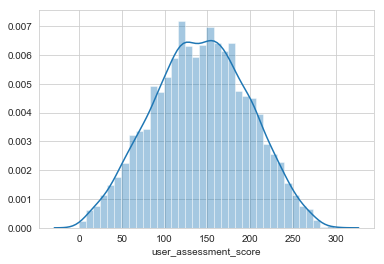

In [10]:
# Plot the assessment scores
sns.distplot(user_assessment_scores['user_assessment_score'])

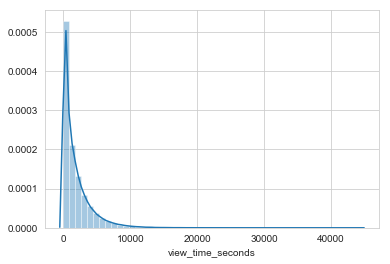

In [11]:
# Plot the view times
sns.distplot(user_course_views['view_time_seconds'])

# The view times are not normally distributed!

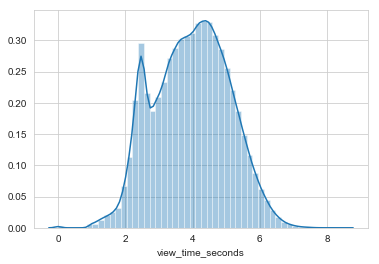

In [12]:
sns.distplot((user_course_views['view_time_seconds'])**0.2)
# let us try to normalzie the 'view_time_seconds' by transforming. 
# the normalization will not affect KNN but help in SVD method that is used later.
user_course_views['view_time_seconds'] = user_course_views['view_time_seconds'] ** 0.2

#### Model Selection and Paramenter Optimization
<br> In this section we will deal with selecting different measures we will be using.
We are trying to find following similarities- 
**<br>- Similarity among users based on their assessments.
<br>- Similarity among users based on their interest tags.
<br>- Similarity among users based on time(in seconds) they spend on each course-tag.
<br>- Similarity among users based on time(in seconds) they spend on each course.
<br>- Similarity among users based on the level of the courses they take and spend time on each of such courses
<br>- Finally, use all the above similarities to calculate one single similarity measure**

The similarity measures for each similarities are different but the scale of similarity are going to be same.(-1 to 1) with 1 means very similar. and 

In [13]:
######### KEEP THIS CELL FOR REFERENCE ######################
"""from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0, 300))
data = Dataset.load_from_df(user_assessment_scores[['user_handle', 'assessment_tag', 'user_assessment_score']], reader)

benchmark = []
sim_options = {'name': 'pearson_baseline'}
for algorithm in [KNNBaseline(sim_options = sim_options), KNNBasic(sim_options = sim_options), KNNWithMeans(), KNNWithZScore()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv = 10, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

reader = Reader(rating_scale=(0, 300))
data = Dataset.load_from_df(user_assessment_scores[['user_handle', 'assessment_tag', 'user_assessment_score']], reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNWithMeans()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)"""

"from surprise.model_selection import train_test_split\n\nreader = Reader(rating_scale=(0, 300))\ndata = Dataset.load_from_df(user_assessment_scores[['user_handle', 'assessment_tag', 'user_assessment_score']], reader)\n\nbenchmark = []\nsim_options = {'name': 'pearson_baseline'}\nfor algorithm in [KNNBaseline(sim_options = sim_options), KNNBasic(sim_options = sim_options), KNNWithMeans(), KNNWithZScore()]:\n    # Perform cross validation\n    results = cross_validate(algorithm, data, measures=['RMSE'], cv = 10, verbose=False)\n\n    # Get results & append algorithm name\n    tmp = pd.DataFrame.from_dict(results).mean(axis=0)\n    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))\n    benchmark.append(tmp)\n\nreader = Reader(rating_scale=(0, 300))\ndata = Dataset.load_from_df(user_assessment_scores[['user_handle', 'assessment_tag', 'user_assessment_score']], reader)\n\n# sample random trainset and testset\n# test set is made of 25% of the ra

We will be using 10 fold cross validation for finding optmial KNN algorithm

In [14]:
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import Reader, Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

def findOptimalKNNAlgorithm(dataframe, user_column, item_column, score_column):
    """This method takes in a dataframe and the columns of user, item, and score. 
        This method will optimize for different KNN algorithms by using 10 fold CV and prints the results."""
    
    reader = Reader(rating_scale=(dataframe[score_column].min(), dataframe[score_column].max()))
    data = Dataset.load_from_df(dataframe[[user_column, item_column, score_column]], reader)
    
    benchmark = []
    
    # we use pearson baseline beacuse unlike other meausures it does not consider only common values.
    # https://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline
    sim_options = {'name': 'pearson_baseline'}
    
    # We are only using KNN algorithm here because similarity measure and getting neighbors is used by only these algorithms
    algorithms = [KNNBaseline(sim_options = sim_options), KNNBasic(sim_options = sim_options), 
                  KNNWithMeans(), KNNWithZScore()]
    for algorithm in algorithms:
        # Perform cross validation. Number of folds = 10. We are using RMSE as performance measure
        results = cross_validate(algorithm, data, measures=['RMSE'], cv = 10, verbose=False)

        # Get results & append algorithm name
        tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        benchmark.append(tmp)
    print(pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse'))

We will find optimal values for each of the similarities we are finding.

In [15]:
findOptimalKNNAlgorithm(user_assessment_scores, 'user_handle', 'assessment_tag', 'user_assessment_score')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [16]:
cleaned_user_interest_df = user_interests[['user_handle', 'interest_tag']].drop_duplicates()
cleaned_user_interest_df['interest_val'] = 1

findOptimalKNNAlgorithm(cleaned_user_interest_df, 'user_handle', 'interest_tag', 'interest_val')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


C:\Python27\lib\site-packages\surprise\prediction_algorithms\algo_base.py:293: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

C:\Python27\lib\site-packages\surprise\prediction_algorithms\knns.py:404: RuntimeWarning: invalid value encountered in double_scalars
  sum_ratings += sim * (r - self.means[nb]) / self.sigmas[nb]


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
               fit_time  test_rmse  test_time
Algorithm                                    
KNNBaseline    145.4056        0.0    35.2041
KNNBasic       138.7636        0.0    33.9758
KNNWithMeans    26.2663        0.0    37.0193
KNNWithZScore   27.2362        0.0    41.0283


The below cell takes time to run. Upto 20 Mins.

In [17]:
user_courses_merge = pd.merge(left = user_course_views, right = course_tags, on = ['course_id'])
grouped_users_course_tags = user_courses_merge[['user_handle', 'course_tags', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_tags'])
meaned_group_user_courses_tag = grouped_users_course_tags.agg('mean').reset_index()
findOptimalKNNAlgorithm(meaned_group_user_courses_tag, 'user_handle', 'course_tags', 'view_time_seconds')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

The below cell takes time to run. Upto 20 Mins.

In [18]:
grouped_users_courses = user_course_views[['user_handle', 'course_id', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_id'])
meaned_group_users_courses = grouped_users_courses.agg('mean').reset_index()
findOptimalKNNAlgorithm(meaned_group_users_courses, 'user_handle', 'course_id', 'view_time_seconds')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

KNNBaseline algorithm is best suited for all the similarities. We will use KNNBaseline and it's neighbors to get the smilar users in our data. Next let us try to optimize for the value of 'K' for our SVD similarity. The bigger values of K will result to slower predictions whereas small 'K' value will result to faster but less accurate predictions.

In [19]:
from sklearn.metrics import mean_squared_error

def find_optimize_value_of_k_SVD(dataframe, index_column, columns_column, values_column):
    """Optmizes the dataframe for a value of K which is the number of dimensions that will 
    explain most of the features without any loss"""
    scores_matrix = dataframe.pivot(index = index_column, columns = columns_column, values = values_column)
    scores_matrix = scores_matrix.fillna(0)
    index_values = scores_matrix.index.values
    # we need reindexed to calclulate the cosine similarities
    reindexed_scores_matrix = scores_matrix.copy()
    reindexed_scores_matrix.index = range(0, index_values.shape[0])

    scores_mean = np.asarray([(np.mean(reindexed_scores_matrix, 1))]).T
    normalised_mat = reindexed_scores_matrix - scores_mean
    A = normalised_mat.T #/ np.sqrt(self.__reindexed_scores_matrix.shape[0] - 1)

    # Using svd
    U, S, V = np.linalg.svd(A, full_matrices = False)

    dim_size = 1
    k_vs_rmse = []
    
    # lets set max dim size to check for optmization.
    max_dim_size = min(scores_mean.shape[0], 2000)
    for dim_size in range(1, max_dim_size, 2):
        # re_create and check MSE to see if it worked!
        S_k = np.diag(S[:dim_size])
        U_k = U[:, :dim_size]
        V_k = V[:dim_size, ]
        A_k = np.dot(np.dot(U_k, S_k), V_k) + scores_mean.T
        rmse = np.sqrt(mean_squared_error(A, A_k))
        k_vs_rmse.append([dim_size, rmse])
    scores_df = pd.DataFrame(k_vs_rmse, columns = ['K', 'RMSE'])

    return scores_df


def get_knee_point(scores_df):
    """Returns a knee point"""
    from kneed import KneeLocator
    kn = KneeLocator(scores_df.iloc[:, 0], scores_df.iloc[:, 1], curve='convex', direction='decreasing')
    return kn.knee

In [20]:
scores_df_ua = find_optimize_value_of_k_SVD(user_assessment_scores, 'user_handle', 
                                            'assessment_tag', 'user_assessment_score')

53


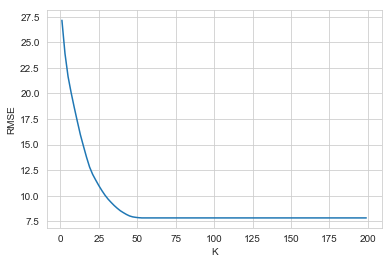

In [22]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_ua[:100])
OPTIMIZED_DIM_SIZE_USER_ASSESSMENT = get_knee_point(scores_df_ua)
print(OPTIMIZED_DIM_SIZE_USER_ASSESSMENT)
OPTIMIZED_DIM_SIZE_USER_ASSESSMENT = 25

In [23]:
scores_df_ui = find_optimize_value_of_k_SVD(cleaned_user_interest_df, 'user_handle', 'interest_tag', 'interest_val')

329


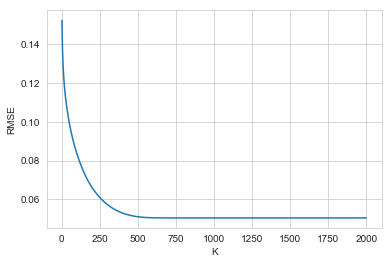

In [24]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_ui)
OPTIMIZED_DIM_SIZE_USER_INTEREST = get_knee_point(scores_df_ui)
print(OPTIMIZED_DIM_SIZE_USER_INTEREST)
# 191 doesn't look like a elbow point setting it to 35
OPTIMIZED_DIM_SIZE_USER_INTEREST = 40

In [25]:
scores_df_uct = find_optimize_value_of_k_SVD(meaned_group_user_courses_tag, 'user_handle', 
                                             'course_tags', 'view_time_seconds')

451


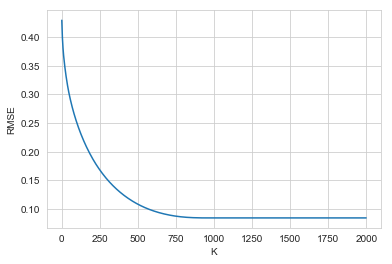

In [26]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_uct[:])
OPTIMIZED_DIM_SIZE_USER_COURSE_TAG = get_knee_point(scores_df_uct)
print(OPTIMIZED_DIM_SIZE_USER_COURSE_TAG)
# the algo is giving wrong elbow setting it manually to 
OPTIMIZED_DIM_SIZE_USER_COURSE_TAG = 80

In [27]:
grouped_users_courses = user_course_views[['user_handle', 'course_id', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_id'])
meaned_group_users_courses = grouped_users_courses.agg('mean').reset_index()
scores_df_uc = find_optimize_value_of_k_SVD(meaned_group_users_courses, 'user_handle', 'course_id', 'view_time_seconds')

575


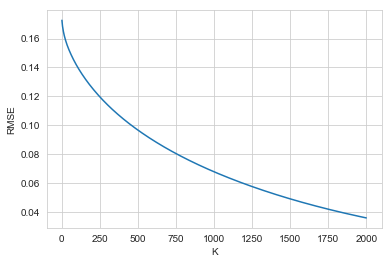

In [28]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_uc)
OPTIMIZED_DIM_SIZE_USER_COURSE = get_knee_point(scores_df_uc)
print(OPTIMIZED_DIM_SIZE_USER_COURSE)
# Setting K optimized value to 120 manually
OPTIMIZED_DIM_SIZE_USER_COURSE = 100

In [29]:
grouped_users_course_level = user_course_views[['user_handle', 'level', 'view_time_seconds']]\
                                .groupby(['user_handle', 'level'])
meaned_group_users_course_level = grouped_users_course_level.agg('mean').reset_index()
scores_df_ucl = find_optimize_value_of_k_SVD(meaned_group_users_course_level, 'user_handle', 'level', 'view_time_seconds')

3


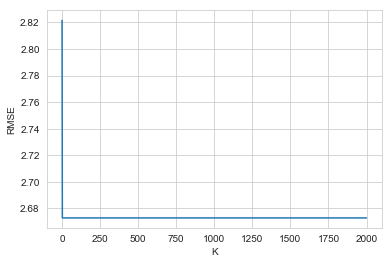

In [30]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_ucl)
OPTIMIZED_DIM_SIZE_USER_COURSE_LEVEL = get_knee_point(scores_df_ucl)
print(OPTIMIZED_DIM_SIZE_USER_COURSE_LEVEL)
OPTIMIZED_DIM_SIZE_USER_COURSE_LEVEL = 3

#### Model and Training Building :
We are trying to find following similarities-
**<br>- Similarity among users based on their assessments.
<br>- Similarity among users based on their interest tags.
<br>- Similarity among users based on time(in seconds) they spend on each course-tag.
<br>- Similarity among users based on time(in seconds) they spend on each course.
<br>- Similarity among users based on the level of the courses they take and spend time on each of such courses
<br>- Finally, use all the above similarities to calculate one single similarity measure**
<br><br>The optimized values found for each algorithm are as below.
<br>- KNNBaseline Algorithm for all the similarities above.
<br>- Cosine similarity for all the similarities above.
<br>- SVD similarity for all the similarities above. With dimesion magnitude optimized for each of the similarities.
<br>- We can also find pearson similarity but it is time consuming.(Heavy on model training)

In [31]:
TOP_CUTOFF_USERS = 10

# Class for similarity measure.
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset

class SimilarityMeasure:
    def __initialize_matrix(self):
        if self.__values_column is None:
            self.__dataframe['temp_val'] = 1
            self.__values_column = 'temp_val'
        self.__scores_matrix = self.__dataframe.pivot(index = self.__index_column, columns= self.__columns_column, 
                                            values = self.__values_column)
        self.__scores_matrix = self.__scores_matrix.fillna(0)
        self.index_values = self.__scores_matrix.index.values
        # we need reindexed to calclulate the cosine similarities
        self.__reindexed_scores_matrix = self.__scores_matrix.copy()
        self.__reindexed_scores_matrix.index = range(0, self.index_values.shape[0])
        self.pearson_similarity_martix = None
        self.cosine_similarities_matrix = None
        self.__sliced = None
        self.__knn_algo = None
    
    def calculate_pearson_similarity(self):
        self.pearson_similarity_martix = self.__scores_matrix.T.corr(method = 'pearson')
        print("Pearson similarity calculated!")
        
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_pearson_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.pearson_similarity_martix is not None:
            user_handle_scores = pd.DataFrame(self.pearson_similarity_martix[user_handle])
            user_handle_scores.columns = [0]
            similar_users = user_handle_scores.sort_values(by=[0], ascending = False)[1:num_similar_users]
            # Normalize between 0 to 1
            #similar_users[0] = (similar_users[0] - min(similar_users[0])) / (max(similar_users[0]) - min(similar_users[0]))
            return similar_users
        else :
            print("Error - Pearson similarity not calculated!!!!")
    
    # Function to calculate cosine similarity.
    def calculate_cosine_similarity(self):
        A_sparse = sparse.csr_matrix(self.__reindexed_scores_matrix)
        self.cosine_similarities_matrix = cosine_similarity(A_sparse, dense_output = False)
        print("Cosine similarity calculated!")
    
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_cosine_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.cosine_similarities_matrix is not None:
            idx = np.where(self.index_values == user_handle)
            scores = pd.DataFrame(self.cosine_similarities_matrix[idx].T.toarray(), index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:num_similar_users]
            # Normalize between 0 to 1
            #similar_users[0] = (similar_users[0] - min(similar_users[0])) / (max(similar_users[0]) - min(similar_users[0]))
            #similar_users = similar_users.fillna(0)
            return similar_users
        else :
            print("Error - Cosine similarity not caclculated!!!!")
        
    def calculate_svd_similarity(self, full_matrix = False, dim_size = 20):
        scores_mean = np.asarray([(np.mean(self.__reindexed_scores_matrix, 1))]).T
        normalised_mat = self.__reindexed_scores_matrix - scores_mean
        A = normalised_mat.T
        # Using svd
        U, S, V = np.linalg.svd(A, full_matrices = full_matrix)
        #Reducing the dimensions
        self.__sliced = V.T[:, :dim_size]
        # special matrix multiplication to get the magnitudes. 
        # element wise multiplication and summation row1 * col1, row2 * col2...so on
        self.__magnitude = np.sqrt(np.einsum('ij, ij -> i', self.__sliced, self.__sliced))
        print("SVD similarity calculated!")

        
    def get_svd_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.__sliced is not None:
            index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
            user_row = self.__sliced[index, :]
            similarity = np.dot(user_row, self.__sliced.T) / (self.__magnitude[index] * self.__magnitude)
            scores = pd.DataFrame(similarity, index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:num_similar_users]
            # Normalize between 0 to 1
            #similar_users[0] = (similar_users[0] - min(similar_users[0])) / (max(similar_users[0]) - min(similar_users[0]))
            return similar_users
        else :
            print("Error - SVD Similarity not calculated!!!!")
    
    
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def train_KNN_BaseLine(self):
        reader = Reader(rating_scale=(self.__dataframe[self.__values_column].min(), 
                                      self.__dataframe[self.__values_column].max()))
        data = Dataset.load_from_df(self.__dataframe[[self.__index_column, self.__columns_column, 
                                                      self.__values_column]], reader) 
        sim_options = {'name': 'pearson_baseline'}
        self.__knn_algo = KNNWithMeans(sim_options)
        # Train the algorithm on the trainset, and predict ratings for the testset
        self.__knn_algo.fit(data.build_full_trainset())
    
    def get_KNN_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.__knn_algo is not None:
            index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
            index_neighbor_users = self.__knn_algo.get_neighbors(index, k = num_similar_users)
            
            scores = pd.DataFrame(self.__knn_algo.sim[index].T, index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:num_similar_users]
            # Normalize between 0 to 1
            #similar_users[0] = (similar_users[0] - min(similar_users[0])) / (max(similar_users[0]) - min(similar_users[0]))
            return similar_users
        else :
            print("Error - KNN Similarity not calculated!!!!")
    
    def isValidUser(self, user_handle):
        return ((self.index_values == user_handle).sum() > 0)
    
    def __init__(self, parameters):
        self.__dataframe = parameters['dataframe'].copy()
        self.__index_column = parameters['index_column']
        # The column in dataframe which will be used to created columns in matrix
        self.__columns_column = parameters['columns_column']
        if 'values_column' in parameters:
            self.__values_column = parameters['values_column']
        else:
            self.__values_column = None
        self.__initialize_matrix()
    
    class UserNotFound(Exception):
        """Raise this execption when user is not found"""
        pass

In [32]:
user_assessment_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_assessment_scores,
                                'index_column' : 'user_handle', 'columns_column' : 'assessment_tag',
                                'values_column' : 'user_assessment_score'
                                })
user_assessment_similarity_measure.train_KNN_BaseLine()
user_assessment_similarity_measure.calculate_cosine_similarity()
user_assessment_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_ASSESSMENT)
user_assessment_similarity_measure.calculate_pearson_similarity()

Computing the msd similarity matrix...
Done computing similarity matrix.
Cosine similarity calculated!
SVD similarity calculated!
Pearson similarity calculated!


In [33]:
print(user_assessment_similarity_measure.get_cosine_similar_users('8887'))
print(user_assessment_similarity_measure.get_svd_similar_users('8887'))
print(user_assessment_similarity_measure.get_KNN_similar_users('8887'))
print(user_assessment_similarity_measure.get_pearson_similar_users('8887'))

             0
9460  0.841721
8412  0.789517
5236  0.788519
5694  0.766058
1494  0.763504
4048  0.729360
840   0.709927
9177  0.703223
7997  0.696422
             0
8412  0.872228
5694  0.790706
5236  0.772198
9460  0.766286
840   0.760116
9177  0.750983
7246  0.747850
1494  0.746683
7997  0.745291
        0
988   1.0
2233  1.0
8074  1.0
6395  1.0
9467  0.5
6060  0.5
1095  0.5
1097  0.5
9872  0.5
                    0
user_handle          
9460         0.834141
5236         0.776508
8412         0.775941
5694         0.752632
1494         0.750021
4048         0.713377
840          0.693611
9177         0.686328
7997         0.683086


C:\Python27\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in divide


In [34]:
user_interest_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_interests[['user_handle', 'interest_tag']].drop_duplicates(),
                                'index_column' : 'user_handle', 'columns_column' : 'interest_tag'
                                })
user_interest_similarity_measure.calculate_cosine_similarity()
user_interest_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_INTEREST)
user_interest_similarity_measure.train_KNN_BaseLine()
#user_interest_similarity_measure.calculate_pearson_similarity()

Cosine similarity calculated!
SVD similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [35]:
print(user_interest_similarity_measure.get_cosine_similar_users('8887'))
print(user_interest_similarity_measure.get_svd_similar_users('8887'))
print(user_interest_similarity_measure.get_KNN_similar_users('8887'))
print(user_interest_similarity_measure.get_pearson_similar_users('8887'))

             0
4616  0.928571
1090  0.925820
8595  0.902007
3576  0.897085
2616  0.897085
6701  0.894427
7809  0.887244
6581  0.887244
3327  0.877328
             0
4616  0.758770
4805  0.746552
5622  0.744774
7809  0.730792
8595  0.698397
4969  0.697123
1090  0.694186
2307  0.668801
8112  0.668589
        0
6133  1.0
6131  1.0
6128  1.0
6127  1.0
6126  1.0
6125  1.0
6124  1.0
6123  1.0
6122  1.0
Error - Pearson similarity not calculated!!!!
None


In [36]:
user_courses_merge = pd.merge(left = user_course_views, right = course_tags, on = ['course_id'])
grouped_users_course_tags = user_courses_merge[['user_handle', 'course_tags', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_tags'])
meaned_group_user_courses_tag = grouped_users_course_tags.agg('mean').reset_index()
user_courseview_tag_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_user_courses_tag[['user_handle', 'course_tags', 
                                                                             'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'course_tags',
                                'values_column' : 'view_time_seconds'
                                })
user_courseview_tag_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_COURSE_TAG)
user_courseview_tag_similarity_measure.calculate_cosine_similarity()
user_courseview_tag_similarity_measure.train_KNN_BaseLine()
#user_courseview_tag_similarity_measure.calculate_pearson_similarity()

SVD similarity calculated!
Cosine similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [37]:
print(user_courseview_tag_similarity_measure.get_cosine_similar_users('8887'))
print(user_courseview_tag_similarity_measure.get_svd_similar_users('8887'))
print(user_courseview_tag_similarity_measure.get_KNN_similar_users('8887'))
print(user_courseview_tag_similarity_measure.get_pearson_similar_users('8887'))

             0
7817  0.436514
5336  0.435969
9275  0.433626
3941  0.429487
9735  0.416445
238   0.415997
4399  0.414570
3301  0.412748
4096  0.408434
             0
9376  0.503582
2108  0.485718
8824  0.477006
238   0.468908
9275  0.446999
5336  0.440732
7187  0.432308
2791  0.429994
6589  0.428914
             0
4832  0.999985
611   0.999985
1642  0.999983
1240  0.999974
7398  0.999970
1865  0.999968
2879  0.999933
8142  0.999920
4026  0.999891
Error - Pearson similarity not calculated!!!!
None


In [38]:
grouped_users_courses = user_course_views[['user_handle', 'course_id', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_id'])
meaned_group_users_courses = grouped_users_courses.agg('mean').reset_index()
user_courseview_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_users_courses[['user_handle', 'course_id', 'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'course_id',
                                'values_column' : 'view_time_seconds'
                                })
user_courseview_similarity_measure.calculate_cosine_similarity()
user_courseview_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_COURSE)
user_courseview_similarity_measure.train_KNN_BaseLine()
#user_courseview_similarity_measure.calculate_pearson_similarity()

Cosine similarity calculated!
SVD similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [39]:
print(user_courseview_similarity_measure.get_cosine_similar_users('8887'))
print(user_courseview_similarity_measure.get_svd_similar_users('8887'))
print(user_courseview_similarity_measure.get_KNN_similar_users('8887'))
print(user_courseview_similarity_measure.get_pearson_similar_users('8887'))

             0
7077  0.313326
9714  0.313326
4550  0.313326
9735  0.289132
8423  0.283480
7700  0.283480
6815  0.278046
5255  0.273364
9938  0.256003
             0
6815  0.626078
6265  0.617205
3062  0.581514
9241  0.578271
5115  0.577414
7077  0.570907
4550  0.570907
9714  0.570907
5255  0.570770
             0
4972  0.999989
2368  0.999985
396   0.999975
5234  0.999972
6043  0.999969
6293  0.999955
7416  0.999852
1891  0.999805
7744  0.999783
Error - Pearson similarity not calculated!!!!
None


In [40]:
grouped_users_course_level = user_course_views[['user_handle', 'level', 'view_time_seconds']]\
                                .groupby(['user_handle', 'level'])
meaned_group_users_course_level = grouped_users_course_level.agg('mean').reset_index()
user_course_level_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_users_course_level[['user_handle', 'level', 'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'level',
                                'values_column' : 'view_time_seconds'
                                })
user_course_level_similarity_measure.calculate_cosine_similarity()
user_course_level_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_COURSE_LEVEL)
user_course_level_similarity_measure.train_KNN_BaseLine()
#user_course_level_similarity_measure.calculate_pearson_similarity()

Cosine similarity calculated!
SVD similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [41]:
print(user_course_level_similarity_measure.get_cosine_similar_users('8887'))
print(user_course_level_similarity_measure.get_svd_similar_users('8887'))
print(user_course_level_similarity_measure.get_KNN_similar_users('8887'))
print(user_course_level_similarity_measure.get_pearson_similar_users('8887'))

        0
4312  1.0
1463  1.0
7028  1.0
2713  1.0
3157  1.0
9014  1.0
3942  1.0
599   1.0
5077  1.0
             0
2798  0.999954
9014  0.999948
7419  0.999923
599   0.999864
4656  0.999818
3968  0.999751
5653  0.999745
821   0.999687
9907  0.999676
             0
5726  0.999999
6297  0.999998
1915  0.999997
268   0.999995
4086  0.999984
8801  0.999983
2333  0.999981
2110  0.999971
2424  0.999968
Error - Pearson similarity not calculated!!!!
None


In [42]:
class SimiliarUsers:
    """A warpper for the model that we will pickle and use for prediction"""
    def get_merged_scores(self, cosine_similarity, svd_similarity, pearson_similarity, knn_similarity, score_type, weight):
        svd_similarity = pd.DataFrame(svd_similarity).reset_index()
        svd_similarity.columns = ['index', 'svd_' + score_type]
        cosine_similarity = pd.DataFrame(cosine_similarity).reset_index()
        cosine_similarity.columns = ['index', 'cosine_' + score_type]
        merged = pd.merge(left = svd_similarity, right = cosine_similarity, on = 'index')
        merged['total_'+score_type] = merged['svd_' + score_type] + merged['cosine_' + score_type]
        n_scores = 2
        if pearson_similarity is not None:
            pearson_similarity = pd.DataFrame(pearson_similarity).reset_index()
            pearson_similarity.columns = ['index', 'pearson_' + score_type]
            merged = pd.merge(left = merged, right = pearson_similarity, on = 'index')
            merged['total_'+score_type] = merged['total_'+score_type] + merged['pearson_' + score_type]
            n_scores = n_scores + 1
        merged['weighted_AVG_'+score_type] = (merged['total_'+score_type] * weight) / n_scores
        return merged
    
    def get_assessment_similarity(self, user_handle):
        if user_assessment_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_assessment_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_assessment_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_assessment_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_assessment_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'assessment', self.score_weights['A'])
        else:
            return None
        
    def get_interest_similarity(self, user_handle):
        if user_interest_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_interest_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_interest_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_interest_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_interest_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'interest', self.score_weights['I'])
        else :
            return None
        
    def get_course_tag_similarity(self, user_handle): 
        if user_courseview_tag_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_courseview_tag_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_courseview_tag_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_courseview_tag_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_courseview_tag_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'course_tag', self.score_weights['CVT'])
        else:
            return None
        
    def get_course_view_similarity(self, user_handle): 
        if user_courseview_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_courseview_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_courseview_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_courseview_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_courseview_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'course_view', self.score_weights['CV'])
        else:
            return None
    def get_course_level_similarity(self, user_handle):
        if user_course_level_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_course_level_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_course_level_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_course_level_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_course_level_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'course_level', self.score_weights['CL'])
        else:
            return None

    def calculate_total_score(self, merged_similarity):
        total_columns = [s for s in merged_similarity.columns if 'AVG' in s]
        print(self.score_weights)
        merged_similarity['AVG_OF_ALL'] = merged_similarity[total_columns].sum(axis=1) / sum(self.score_weights.values())
        merged_similarity = merged_similarity.sort_values(by=['AVG_OF_ALL'], ascending = False)
        return merged_similarity
    
    def set_score_weights(self, new_weights):
        if new_weights is not None:
            self.score_weights = new_weights
        else:
            print("Invalid weights passed!!!!")
            
    def get_similar_users(self, user_handle):
        #store old weight because the weights dictionary will change if any score not present.
        temp_weights = self.score_weights.copy()
        merged_similarity = None
        
        user_assessment_similarity = self.get_assessment_similarity(user_handle)
        user_interest_similarity = self.get_interest_similarity(user_handle)
        
        if (user_assessment_similarity is not None) and (user_interest_similarity is not None):
            merged_similarity = pd.merge(user_assessment_similarity, user_interest_similarity, on = 'index')
        elif user_assessment_similarity is not None:
            del self.score_weights['I']
            merged_similarity = user_assessment_similarity
        elif user_interest_similarity is not None:
            del self.score_weights['A']
            merged_similarity = user_interest_similarity
            
        user_coursetag_similarity = self.get_course_tag_similarity(user_handle)
        if (user_coursetag_similarity is not None):
            merged_similarity = pd.merge(merged_similarity, user_coursetag_similarity, on = 'index')
        else:
            del self.score_weights['CVT']
            
        user_courseview_similarity = self.get_course_view_similarity(user_handle)
        if (user_courseview_similarity is not None):
            merged_similarity = pd.merge(merged_similarity, user_courseview_similarity, on = 'index')
        else:
            del self.score_weights['CV']
            
        user_courselevel_similarity = self.get_course_level_similarity(user_handle)
        if (user_courselevel_similarity is not None):
            merged_similarity = pd.merge(merged_similarity, user_courselevel_similarity, on = 'index')
        else:
            del self.score_weights['CL']
            
        if merged_similarity is not None:
            merged_similarity = self.calculate_total_score(merged_similarity)
            merged_similarity = merged_similarity.rename(index=str, columns={"index": "user_handle"})
        
        # set the weight back to original
        self.score_weights = temp_weights
        return merged_similarity
    
    def __init__(self, parameters):
        self.user_assessment_similarity_measure = parameters['user_assessment_similarity_measure']
        self.user_interest_similarity_measure = parameters['user_interest_similarity_measure']
        self.user_courseview_tag_similarity_measure = parameters['user_courseview_tag_similarity_measure']
        self.user_courseview_similarity_measure = parameters['user_courseview_similarity_measure']
        self.user_course_level_similarity_measure = parameters['user_course_level_similarity_measure']
        if 'score_weights' in parameters:
            self.score_weights = parameters['score_weights']
        else:
            # By default give equal weight to all the scores
            # A = Assessment, I = User Interest, CVT = Course view tags, CV = Course View, CL = Course Level
            self.score_weights = {'A' : 1, 'I' : 1, 'CVT' : 1, 'CV' : 1, 'CL' : 1}
        self.N_USERS_TO_COMPARE = 10000
        
similarity_measures = {
    'user_assessment_similarity_measure' : user_assessment_similarity_measure,
    'user_interest_similarity_measure' : user_interest_similarity_measure,
    'user_courseview_tag_similarity_measure' : user_courseview_tag_similarity_measure,
    'user_courseview_similarity_measure' : user_courseview_similarity_measure,
    'user_course_level_similarity_measure' : user_course_level_similarity_measure
}
similar_users_model = SimiliarUsers(similarity_measures)
similar_users_df = similar_users_model.get_similar_users('1')
similar_users_model.score_weights

Error - Pearson similarity not calculated!!!!
Error - Pearson similarity not calculated!!!!
Error - Pearson similarity not calculated!!!!
Error - Pearson similarity not calculated!!!!
{'I': 1, 'CVT': 1, 'CV': 1, 'CL': 1}


{'A': 1, 'CL': 1, 'CV': 1, 'CVT': 1, 'I': 1}

In [43]:
similarity_measures = {
    'user_assessment_similarity_measure' : user_assessment_similarity_measure,
    'user_interest_similarity_measure' : user_interest_similarity_measure,
    'user_courseview_tag_similarity_measure' : user_courseview_tag_similarity_measure,
    'user_courseview_similarity_measure' : user_courseview_similarity_measure,
    'user_course_level_similarity_measure' : user_course_level_similarity_measure,
    'score_weights' : {'A' : 1, 'I' : 1, 'CVT' : 1, 'CV' : 1, 'CL' : 1}
}
similar_users_model = SimiliarUsers(similarity_measures)
similar_users_model.set_score_weights({'A' : 4, 'I' : 4, 'CVT' : 1, 'CV' : 2, 'CL' : 1})
similar_users_df = similar_users_model.get_similar_users('1')
print(similar_users_df.columns)
similar_users_df

Error - Pearson similarity not calculated!!!!
Error - Pearson similarity not calculated!!!!
Error - Pearson similarity not calculated!!!!
Error - Pearson similarity not calculated!!!!
{'I': 4, 'CVT': 1, 'CV': 2, 'CL': 1}
Index([u'user_handle', u'svd_interest', u'cosine_interest', u'total_interest',
       u'weighted_AVG_interest', u'svd_course_tag', u'cosine_course_tag',
       u'total_course_tag', u'weighted_AVG_course_tag', u'svd_course_view',
       u'cosine_course_view', u'total_course_view',
       u'weighted_AVG_course_view', u'svd_course_level',
       u'cosine_course_level', u'total_course_level',
       u'weighted_AVG_course_level', u'AVG_OF_ALL'],
      dtype='object')


,user_handle,svd_interest,cosine_interest,total_interest,weighted_AVG_interest,svd_course_tag,cosine_course_tag,total_course_tag,weighted_AVG_course_tag,svd_course_view,cosine_course_view,total_course_view,weighted_AVG_course_view,svd_course_level,cosine_course_level,total_course_level,weighted_AVG_course_level,AVG_OF_ALL
132,691,0.350182,0.684712,1.034895,2.069789,0.774473,0.714715,1.489188,0.744594,0.661832,0.505936,1.167768,1.167768,0.075326,0.727447,0.802773,0.401387,0.547942
304,6251,0.281661,0.699234,0.980895,1.961790,0.774473,0.714715,1.489188,0.744594,0.661832,0.505936,1.167768,1.167768,0.075326,0.727447,0.802773,0.401387,0.534442
4,3200,0.725886,0.855162,1.581048,3.162097,-0.052290,0.148025,0.095735,0.047867,0.003532,0.058832,0.062364,0.062364,0.861156,0.989153,1.850309,0.925155,0.524685
226,8146,0.306555,0.708142,1.014697,2.029393,0.650727,0.650709,1.301435,0.650718,0.481604,0.369292,0.850896,0.850896,0.327108,0.979237,1.306345,0.653172,0.523022
17,9561,0.524617,0.816094,1.340712,2.681423,0.269377,0.245916,0.515292,0.257646,0.171234,0.143115,0.314350,0.314350,0.692434,0.976047,1.668481,0.834241,0.510957
7,680,0.658800,0.886405,1.545205,3.090410,-0.063299,0.000000,-0.063299,-0.031650,-0.018236,0.000000,-0.018236,-0.018236,0.969621,0.950850,1.920471,0.960236,0.500095
0,3557,0.858217,0.915584,1.773800,3.547601,-0.168324,0.000000,-0.168324,-0.084162,0.011961,0.000000,0.011961,0.011961,0.143221,0.727447,0.870668,0.435334,0.488842
67,2835,0.399411,0.690654,1.090065,2.180131,0.344764,0.318295,0.663060,0.331530,0.296326,0.179813,0.476139,0.476139,0.514663,0.990342,1.505005,0.752503,0.467538
11,6148,0.602835,0.793588,1.396423,2.792846,0.033653,0.199804,0.233457,0.116728,0.222695,0.096576,0.319271,0.319271,0.033750,0.965860,0.999610,0.499805,0.466081
1,1968,0.841464,0.873326,1.714790,3.429579,-0.045452,0.000000,-0.045452,-0.022726,-0.031499,0.000000,-0.031499,-0.031499,0.029482,0.570356,0.599838,0.299919,0.459409


In [44]:
score_weights = {'A' : 1, 'I' : 8, 'CVT' : 0, 'CV' : 0, 'CL' : 0}
sum(score_weights.values())

9

In [45]:
user_course_views.columns

Index([u'user_handle', u'view_date', u'course_id', u'author_handle', u'level',
       u'view_time_seconds'],
      dtype='object')

In [46]:
ref = '1'
summary = ''
a = user_assessment_scores[user_assessment_scores.user_handle == ref][['assessment_tag', 'user_assessment_score']]
if a.shape[0] != 0:
    summary = a.to_string()
    
i = user_interests[user_interests.user_handle == ref]['interest_tag']
if i.shape[0] != 0:
    summary = summary + i.to_string()

cv = user_course_views[user_course_views.user_handle == ref][['course_id', 'view_time_seconds']]
if cv.shape[0] != 0:
    summary = summary + cv.to_string()
summary

u'0              mvc-scaffolding\n1                         mvc2\n2             mvc-html-helpers\n3                     mvc4-ioc\n4                  mvc-testing\n5                         mvc3\n6                         mvc5\n7                         mvc4\n8                  asp.net-mvc\n9                          mvc\n10                     angular\n11       javascript-frameworks\n12        javascript-libraries\n13                  javascript\n14                          c#\n15                        java\n16                     asp.net\n17                    react.js\n18                        .net\n19                asp.net-core\n20                       html5\n21          ice-cream-sandwich\n22                     android\n23                          ef\n24            entity-framework\n25                  powershell\n26               powershell-v3\n27                  sharepoint\n28               data-analysis\n29                      python\n30             design-patterns\n31    

#### Deployment :